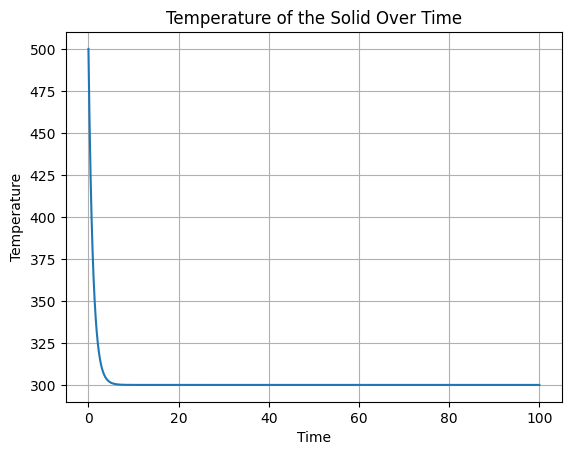

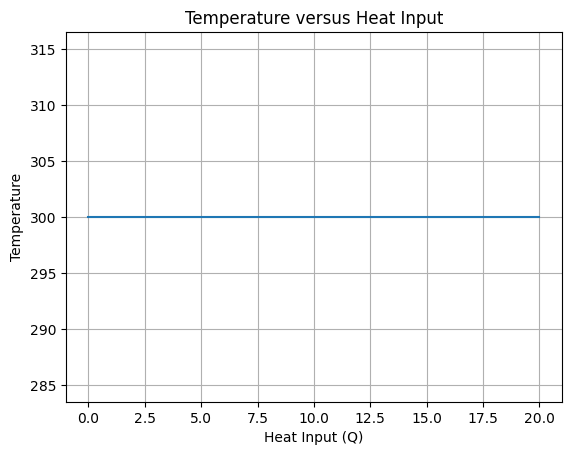

Specific heat capacity Cp/V: -2.3569920451478112e-14


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 0.1  # Thermal conductivity
A = 1    # Surface area
d = 0.1  # Thickness of the solid
Tc = 300  # Temperature of the environment
To = 500  # Initial temperature of the solid
dt = 0.01  # Time step
tfinal = 100  # Final time

# Function for the rate of heat transfer
def heat_transfer_rate(T):
    return -K * A * (T - Tc) / d

# Function to solve the differential equation numerically
def solve_temperature():
    num_steps = int(tfinal / dt)
    T_values = np.zeros(num_steps)
    T_values[0] = To
    for i in range(1, num_steps):
        dQdt = heat_transfer_rate(T_values[i - 1])
        T_values[i] = T_values[i - 1] + dQdt * dt
    return T_values

# Solve the differential equation numerically
time_values = np.arange(0, tfinal, dt)
temperature_values = solve_temperature()

# Plot temperature versus time
plt.plot(time_values, temperature_values)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature of the Solid Over Time')
plt.grid(True)
plt.show()

# Calculate specific heat capacity Cp/V
heat_inputs = np.linspace(0, K * A * (To - Tc), 100)  # Range of heat inputs
temperatures = np.zeros_like(heat_inputs)
for i, Q in enumerate(heat_inputs):
    T_final = solve_temperature()[-1]  # Temperature at the end of simulation
    temperatures[i] = T_final

# Plot temperature versus heat input
plt.plot(heat_inputs, temperatures)
plt.xlabel('Heat Input (Q)')
plt.ylabel('Temperature')
plt.title('Temperature versus Heat Input')
plt.grid(True)
plt.show()

# Extract slope (specific heat capacity Cp/V)
slope, _ = np.polyfit(heat_inputs, temperatures, 1)
Cp_V = slope
print("Specific heat capacity Cp/V:", Cp_V)

